<a href="https://colab.research.google.com/github/nhula01/polymath/blob/main/Module_B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**17.1 Interpolation Problem**

Assume we have some data points

The independent data is $x_i$

The dependent data is $y_i$

Now, we like to estimate many points such that $\hat{y_i}(x_i)=y_i$ for all the given points

As for the new data points, we would like to estimate and the data still requires to inform the user about the quality of interpolation. The previous statement sets interpolation apart from regression.



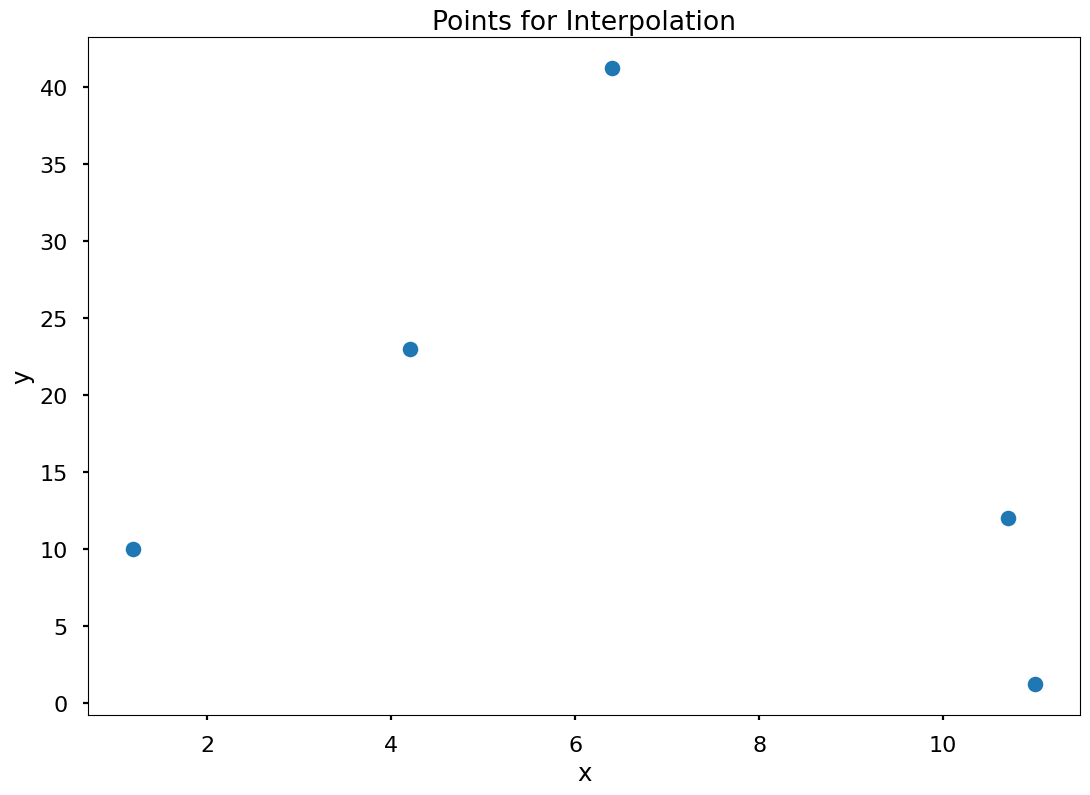

In [20]:
import matplotlib.pyplot as plt
import numpy as np
# let's create a set of data for interpolation
x = [1.2, 4.2, 6.4, 10.7, 11]
y = [10, 23, 41.2,12, 1.2]
plt.plot(x,y,'o')
plt.title('Points for Interpolation')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

**17.2 Linear Interpolation**

Assume all given data points are in ascending order: $x_{i+1}>x_i$

Since we are interested in the new x-positions ($x_i<x<x_{i+1}$), we can interpolate them using linear order such that $\hat{y}(x) = y_i + \frac{(y_{i+1}-y_i)(x-x_i)}{(x_{i+1}-x_i)}$

In [21]:
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt

plt.style.use('seaborn-poster')

# let us now intepolate one data point from our data above
f = interp1d(x, y)
y_hat = f(3)
print(y_hat)

17.8


<ipython-input-21-640f67c0b9fb>:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-poster')


In [22]:
#print(f(100))
# but you better be careful with extrapolation!!! not a good practice

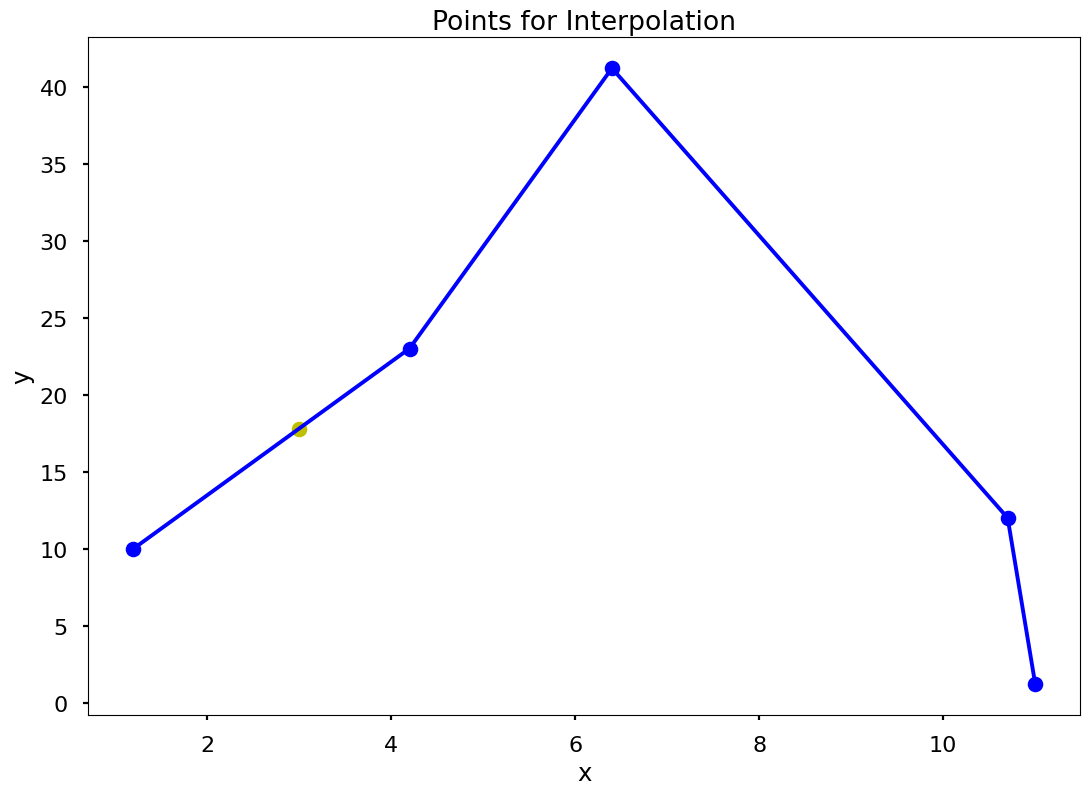

In [23]:
# let's plot the newly created point on our original data
plt.plot(3,y_hat,'oy')
plt.plot(x,y,'-ob')
plt.title('Points for Interpolation')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Text(0, 0.5, 'y')

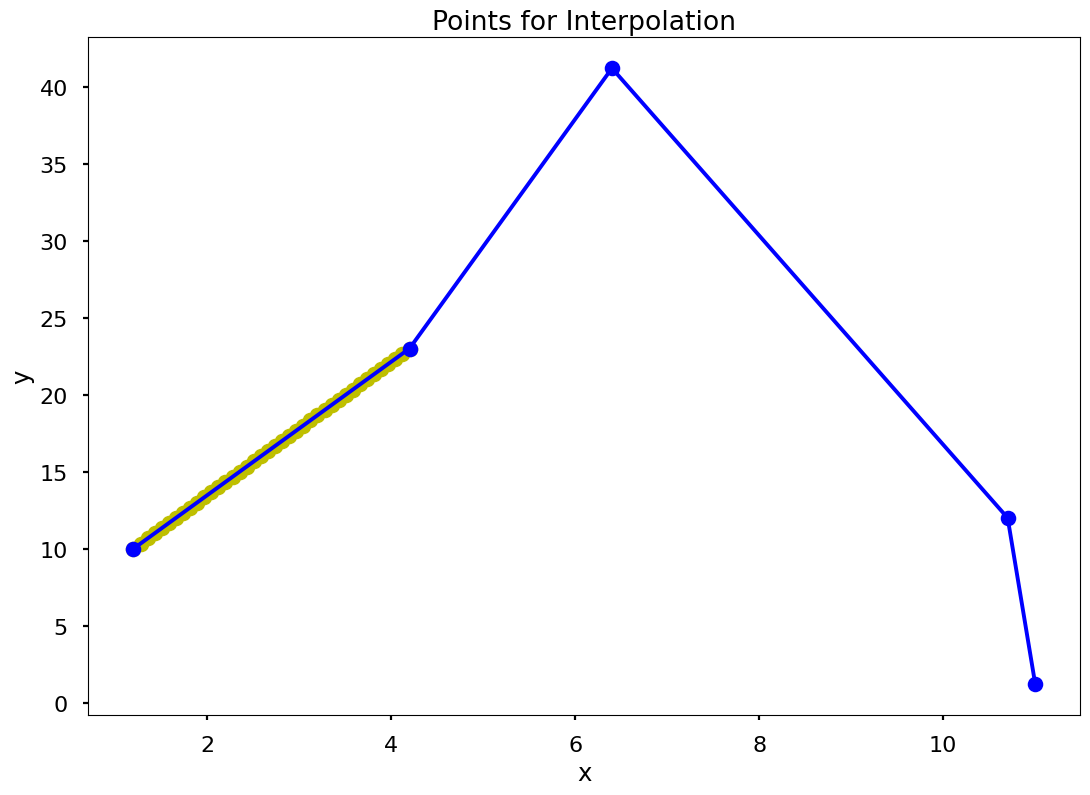

In [24]:
# let us now plot 40 data points between a section to see anything else
x_new = np.linspace(1.2,4.2,40)
f = interp1d(x, y)
plt.plot(x_new,f(x_new),'oy')
plt.plot(x,y,'-ob')
plt.title('Points for Interpolation')
plt.xlabel('x')
plt.ylabel('y')
# since this is a linear order interpolation, all data points will lie on top as a line

**17.3 Cubic Spline Interpolation**

Between two data points $(x_i,y_i)$ and $(x_{i+1}, y_{i+1})$, we assume they are connected by a cubic function $S_i(x)=a_ix^3+b_ix^2+c_ix+d_i$

The task for making cubic spline interpolations is to find $a_i,b_i,c_i$ and $d_i$.

For n data points, we will need to find $n-1$ cubic functions. And thus, we need to find $4(n-1)$ equations to find all coefficients.

From two given data points, we have $2(n-1)$ equations:

$S_i(x_i)=y_i$ and $S_i(x_{i+1})=y_{i+1}$ for i from 1 to n-1

After constraints on the smoothness at the intersections, we have $2(n-2)$ more equations.

The last two constraints can be any arbitrary numbers, but we usually set them 0.

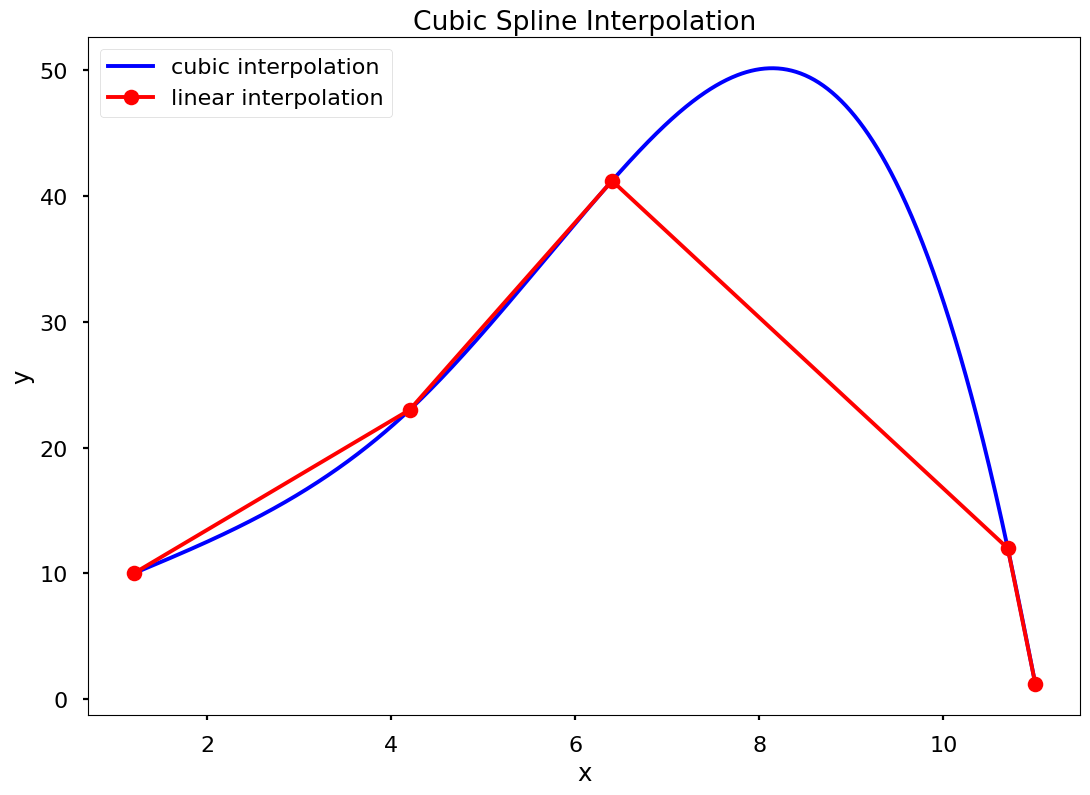

In [27]:
from scipy.interpolate import CubicSpline
import numpy as np
import matplotlib.pyplot as plt

f = CubicSpline(x, y, bc_type='natural')
x_new = np.linspace(1.2, 11, 1000)
y_new = f(x_new) #using x_new from above to find cubic spline

plt.plot(x_new, y_new, 'b', label='cubic interpolation')
plt.plot(x, y, '-ro', label='linear interpolation')
plt.title('Cubic Spline Interpolation')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

**17.4. Lagrange Polynomial Interpolation**

Now, we encounter another interpolation that works with all the given data points at the same time instead of each pair. This is called Lagrange polynomial where $L(x_i)=y_i$

We find this polynomial by establishing the linear combination of Lagrange basis polynomials $P_i(x)=\prod_{j=1,j\neq i}^n\frac{x-x_j}{x_i-x_j}$

<ipython-input-30-4b7d74daf953>:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-poster')


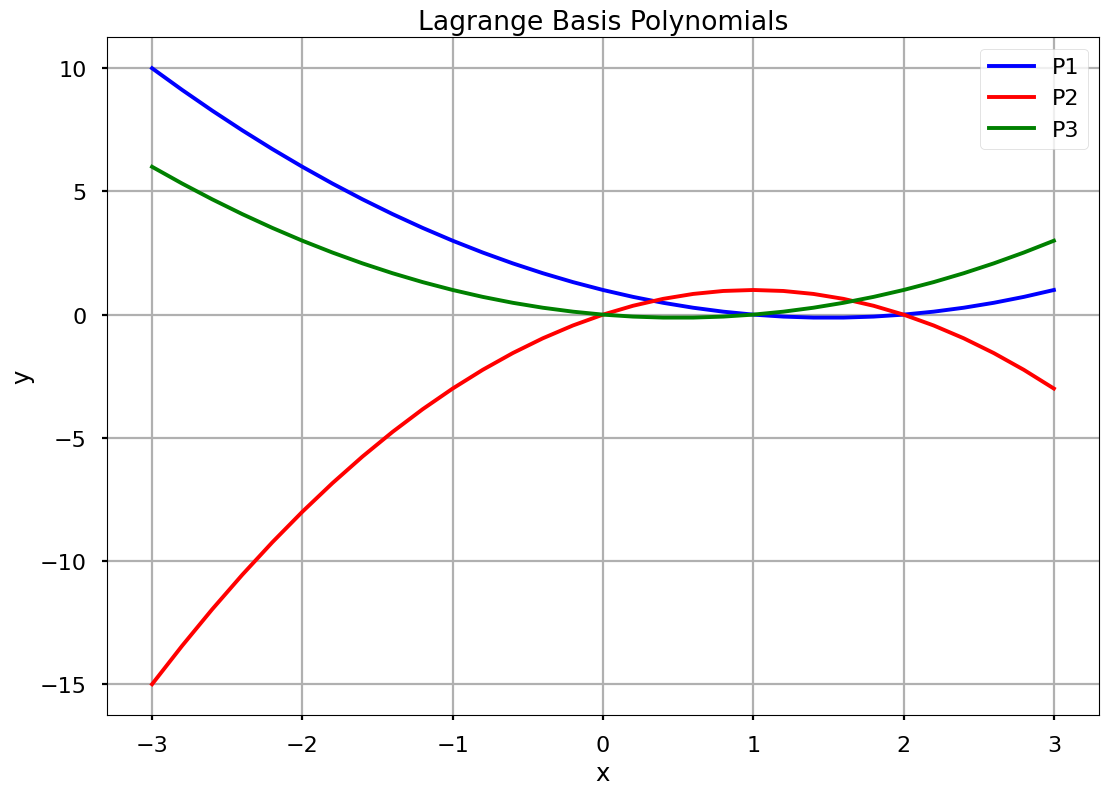

In [30]:
import numpy as np
import numpy.polynomial.polynomial as poly
import matplotlib.pyplot as plt

plt.style.use('seaborn-poster')

#given the data points
x = [0, 1, 2]
y = [1, 3, 2]

# get the basis polynomial functions
P1 = poly.Polynomial([1,-1.5,.5])
P2 = poly.Polynomial([0, 2,-1])
P3 = poly.Polynomial([0,-.5,.5])

#create a range to plot our new polynomials
x_new = np.arange(-3.0, 3.1, 0.2)

#plot the basis polynomials
plt.plot(x_new, P1(x_new), 'b', label = 'P1')
plt.plot(x_new, P2(x_new), 'r', label = 'P2')
plt.plot(x_new, P3(x_new), 'g', label = 'P3')

plt.title('Lagrange Basis Polynomials')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.legend()
plt.show()

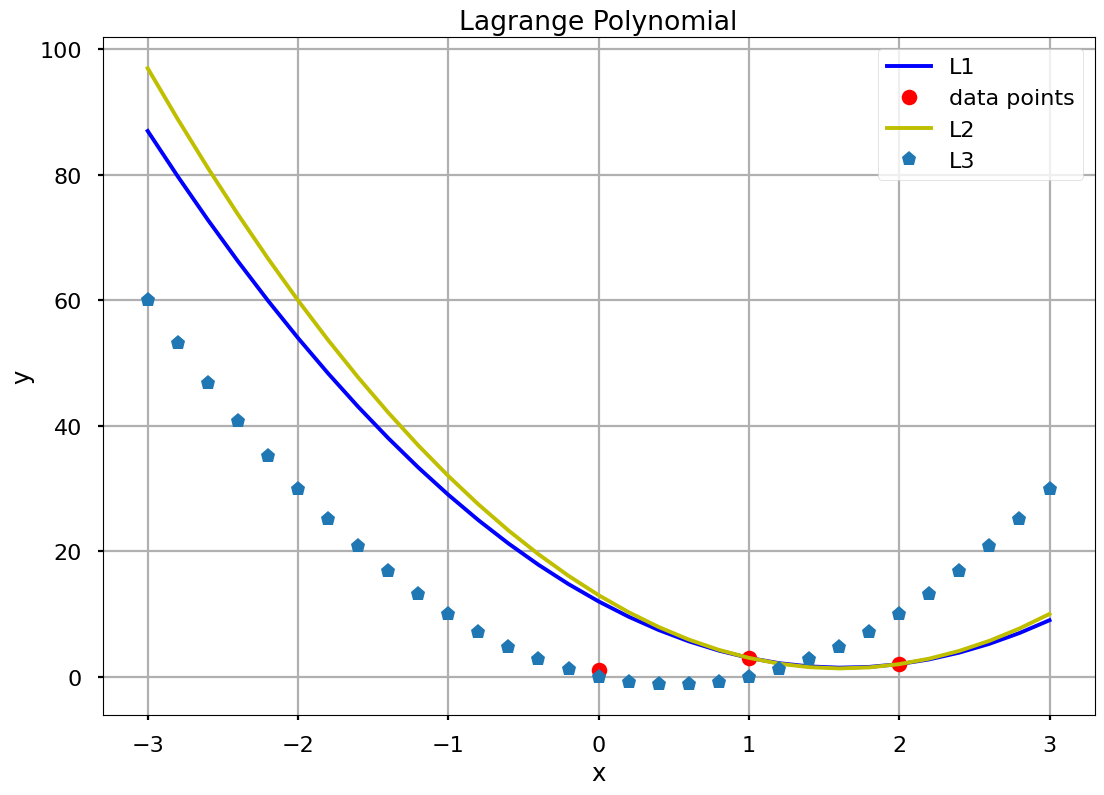

In [39]:

L1 = 1*P1 + 3*P2 + 2*P3
plt.plot(x_new, L(x_new), 'b', label='L1')
plt.plot(x, y, 'ro', label='data points')

# if we change any number at P1, P2, and P3, we will see that the position of the point is not matched.
L2 = 13*P1 + 3*P2 + 2*P3
plt.plot(x_new, L2(x_new), 'y', label='L2')

L3 =  10*P3
plt.plot(x_new, L3(x_new), 'p', label='L3')

plt.title('Lagrange Polynomial')
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

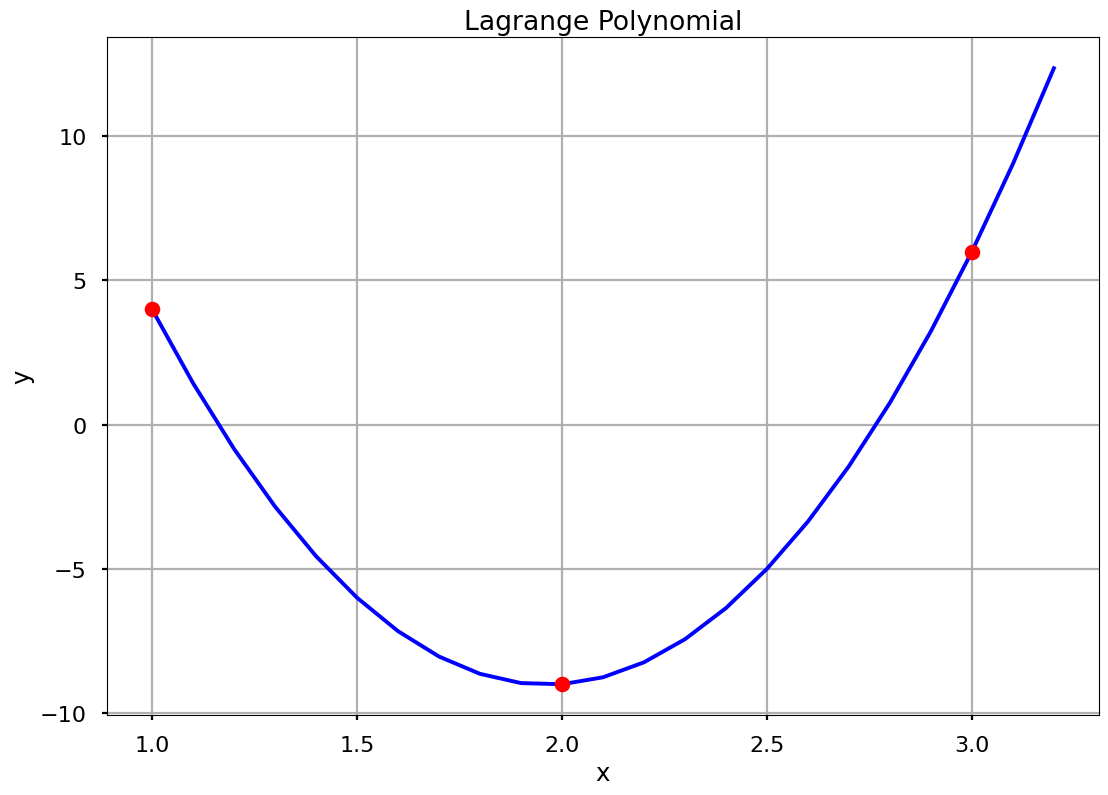

In [48]:
# the last one was doing all the calculations by hands, now we show that all this could be done by a library called scipy

from scipy.interpolate import lagrange
x=[1,2,3]
y=[4,-9,6]
f = lagrange(x, y)
x_new = np.arange(1, 3.3, 0.1)
plt.plot(x_new, f(x_new), 'b')
plt.plot(x, y, 'ro')
plt.title('Lagrange Polynomial')
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

**17.5. Newton's Polynomial Interpolation**

Another interpolation is the Newton's polynomial in the form $f(x)=\sum_{i=0}^na_in_i(x)$ where $n_i(x)=\prod_{j=0}^{i-1}(x-x_j)$

The coefficients of this polynomial is very easy to find. The pattern will form divided differences which we can calculate using python.

<ipython-input-50-61dd3608f431>:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-poster')


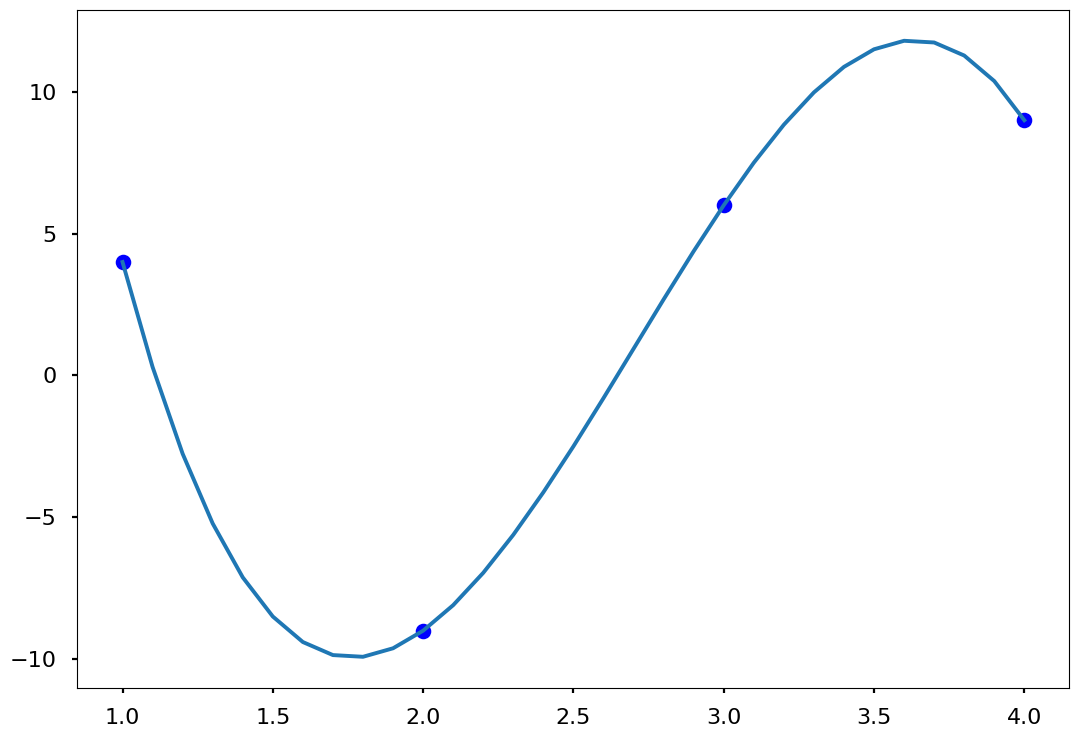

In [50]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-poster')
%matplotlib inline
def divided_diff(x, y):
    '''
    function to calculate the divided
    differences table
    '''
    n = len(y)
    coef = np.zeros([n, n])
    # the first column is y
    coef[:,0] = y
    for j in range(1,n):
        for i in range(n-j):
            coef[i][j] = \
           (coef[i+1][j-1] - coef[i][j-1]) / (x[i+j]-x[i])
    return coef
def newton_poly(coef, x_data, x):
    '''
    evaluate the newton polynomial
    at x
    '''
    n = len(x_data) - 1
    p = coef[n]
    for k in range(1,n+1):
        p = coef[n-k] + (x -x_data[n-k])*p
    return p

# evaluates x=[1,2,3,4] y=[4,-9,6,9]
x = np.array([1, 2, 3, 4])
y = np.array([4, -9, 6, 9])
# get the divided difference coef
a_s = divided_diff(x, y)[0, :]

# evaluate on new data points
x_new = np.arange(1, 4.1, .1)
y_new = newton_poly(a_s, x, x_new)

plt.plot(x, y, 'bo')
plt.plot(x_new, y_new)